In [59]:
## 20220550 윤명섭

import pandas as pd

# 미국
RawUSdf = pd.read_csv("/content/USA-covid data.csv")

US_TtlCases = RawUSdf[['tot_cases', 'date_updated']]
US_DateIndexDf = US_TtlCases.set_index('date_updated')
print(US_DateIndexDf.head())

# 캘리포니아
RawCAdf = pd.read_csv("/content/CA-covid data.csv")

CA_TtlCases = RawCAdf[['tot_cases', 'date_updated']]
CA_DateIndexDf = CA_TtlCases.set_index('date_updated')
print(CA_DateIndexDf.head())

# 일리노이
RawILdf = pd.read_csv("/content/IL-covid data.csv")

IL_TtlCases = RawILdf[['tot_cases', 'date_updated']]
IL_DateIndexDf = IL_TtlCases.set_index('date_updated')
print(IL_DateIndexDf.head())

# 텍사스
RawTXdf = pd.read_csv("/content/TX-covid data.csv")

TX_TtlCases = RawTXdf[['tot_cases', 'date_updated']]
TX_DateIndexDf = TX_TtlCases.set_index('date_updated')
print(TX_DateIndexDf.head())

# 버지니아
RawVAdf = pd.read_csv("/content/VA-covid data.csv")

VA_TtlCases = RawVAdf[['tot_cases', 'date_updated']]
VA_DateIndexDf = VA_TtlCases.set_index('date_updated')
print(VA_DateIndexDf.head())

# 워싱턴
RawWAdf = pd.read_csv("/content/WA-covid data.csv")

WA_TtlCases = RawWAdf[['tot_cases', 'date_updated']]
WA_DateIndexDf = WA_TtlCases.set_index('date_updated')
print(WA_DateIndexDf.head())


              tot_cases
date_updated           
02/23/2023      2434631
12/22/2022      1507707
02/23/2023      3061141
03/30/2023      1588259
02/02/2023      1548508
              tot_cases
date_updated           
01/23/2020            0
01/30/2020            2
02/06/2020            8
02/13/2020           16
02/20/2020           30
              tot_cases
date_updated           
04/27/2023      4131816
01/30/2020            1
02/06/2020            2
02/13/2020            2
02/20/2020            2
              tot_cases
date_updated           
01/23/2020            0
01/30/2020            0
02/06/2020            0
02/13/2020            0
02/20/2020            0
              tot_cases
date_updated           
02/09/2023      2268016
02/16/2023      2275330
02/06/2020            0
02/13/2020            0
02/20/2020            0
              tot_cases
date_updated           
01/23/2020            1
01/30/2020            1
02/06/2020            1
02/13/2020            1
02/20/2020      

In [51]:
CA_population = 39_370_000
IL_population = 12_590_000
TX_population = 29_360_000
VA_population = 8_591_000
WA_population = 712_800
USA_population = 338_289_856

CA_rate = round((CA_population / USA_population), 3)
IL_rate = round((IL_population / USA_population), 3)
TX_rate = round((TX_population / USA_population), 3)
VA_rate = round((VA_population / USA_population), 3)
WA_rate = round((WA_population / USA_population), 3)

print(CA_rate,'\n', IL_rate,'\n', TX_rate,'\n', VA_rate,'\n', WA_rate)


0.116 
 0.037 
 0.087 
 0.025 
 0.002


In [53]:
CA_DateIndexDf.index = pd.to_datetime(CA_DateIndexDf.index)
IL_DateIndexDf.index = pd.to_datetime(IL_DateIndexDf.index)
TX_DateIndexDf.index = pd.to_datetime(TX_DateIndexDf.index)
VA_DateIndexDf.index = pd.to_datetime(VA_DateIndexDf.index)
WA_DateIndexDf.index = pd.to_datetime(WA_DateIndexDf.index)
US_DateIndexDf.index = pd.to_datetime(US_DateIndexDf.index)

# CA_DateIndexDf.index = CA_DateIndexDf.index.astype('datetime64[ns]')
# IL_DateIndexDf.index = IL_DateIndexDf.index.astype('datetime64[ns]')
# TX_DateIndexDf.index = TX_DateIndexDf.index.astype('datetime64[ns]')
# VA_DateIndexDf.index = VA_DateIndexDf.index.astype('datetime64[ns]')
# WA_DateIndexDf.index = WA_DateIndexDf.index.astype('datetime64[ns]')
# US_DateIndexDf.index = US_DateIndexDf.index.astype('datetime64[ns]')

print(CA_DateIndexDf.index.dtype)
print(IL_DateIndexDf.index.dtype)
print(TX_DateIndexDf.index.dtype)
print(VA_DateIndexDf.index.dtype)
print(WA_DateIndexDf.index.dtype)
print(US_DateIndexDf.index.dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [61]:
FinalDf = pd.concat([CA_DateIndexDf*CA_rate, IL_DateIndexDf*IL_rate, TX_DateIndexDf*TX_rate,
                     VA_DateIndexDf*VA_rate, WA_DateIndexDf*WA_rate], axis= 1)

FinalDf.columns = ['CA', 'IL', 'TX', 'VA', 'WA']
print(FinalDf.head())

                 CA     IL   TX   VA     WA
date_updated                               
01/23/2020    0.000  0.000  0.0  0.0  0.002
01/30/2020    0.232  0.037  0.0  0.0  0.002
02/06/2020    0.928  0.074  0.0  0.0  0.002
02/13/2020    1.856  0.074  0.0  0.0  0.002
02/20/2020    3.480  0.074  0.0  0.0  0.002


<Axes: xlabel='date_updated'>

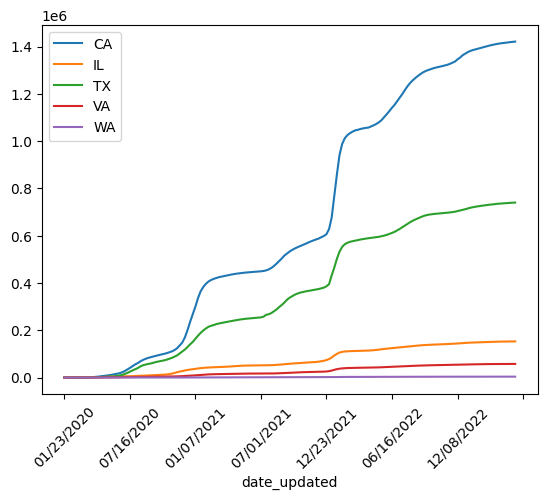

In [62]:
FinalDf.plot.line(rot= 45)

# 워싱턴 주가 코로나 상황이 가장 완화된 주이다.